##PROJECT XỬ LÝ ẢNH SỐ:PHÂN LOẠI CÂY DỰA TRÊN LÁ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#unzip dataset

In [4]:
!unzip /content/drive/MyDrive/dataset/Leaves_fix-20230719T150141Z-001.zip

Archive:  /content/drive/MyDrive/dataset/Leaves_fix-20230719T150141Z-001.zip
  inflating: Leaves_fix/23/3062.jpg  
  inflating: Leaves_fix/23/3098.jpg  
  inflating: Leaves_fix/23/3066.jpg  
  inflating: Leaves_fix/23/3070.jpg  
  inflating: Leaves_fix/23/3092.jpg  
  inflating: Leaves_fix/23/3075.jpg  
  inflating: Leaves_fix/23/3088.jpg  
  inflating: Leaves_fix/23/3099.jpg  
  inflating: Leaves_fix/23/3086.jpg  
  inflating: Leaves_fix/23/3065.jpg  
  inflating: Leaves_fix/23/3056.jpg  
  inflating: Leaves_fix/23/3061.jpg  
  inflating: Leaves_fix/23/3090.jpg  
  inflating: Leaves_fix/23/3087.jpg  
  inflating: Leaves_fix/23/3067.jpg  
  inflating: Leaves_fix/23/3058.jpg  
  inflating: Leaves_fix/23/3082.jpg  
  inflating: Leaves_fix/23/3100.jpg  
  inflating: Leaves_fix/23/3073.jpg  
  inflating: Leaves_fix/23/3101.jpg  
  inflating: Leaves_fix/23/3108.jpg  
  inflating: Leaves_fix/23/3078.jpg  
  inflating: Leaves_fix/23/3104.jpg  
  inflating: Leaves_fix/23/3109.jpg  
  inflating

#HOG+SVM: Feature Extraction and Training

Độ chính xác trên tập kiểm tra: 0.9031413612565445

Báo cáo phân loại:
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       0.83      0.83      0.83        12
           3       0.94      1.00      0.97        16
           4       1.00      0.94      0.97        18
           5       1.00      0.91      0.95        11
           6       0.88      1.00      0.94        15
           7       0.83      1.00      0.91         5
           8       0.86      0.92      0.89        13
           9       0.67      0.57      0.62         7
          10       0.64      1.00      0.78         9
          11       1.00      0.82      0.90        11
          12       0.94      0.88      0.91        17
          13       1.00      0.91      0.95        11
          14       0.67      0.75      0.71         8
          15       0.56      0.83      0.67         6
          16       1.00      0.88      0.93         8
          

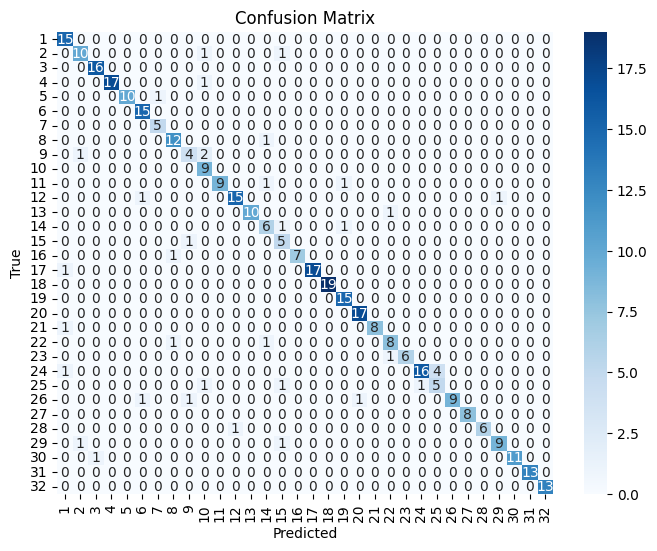

In [30]:
import cv2
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import hog
import numpy as np
import joblib

def extract_hog_features(image_path, save_path=None):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    if save_path:
        image_name = os.path.basename(image_path)
        save_path = os.path.join(save_path, image_name)
        cv2.imwrite(save_path, hog_image)

    return hog_features

def load_data(root_folder):
    X = []
    y = []
    hog_images_folder = "hog_images"
    if not os.path.exists(hog_images_folder):
        os.makedirs(hog_images_folder)
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            hog_features = extract_hog_features(image_path, save_path=hog_images_folder)
            X.append(hog_features)
            y.append(int(class_folder))

    return np.array(X), np.array(y)

def main():
    root_folder = "/content/Leaves_fix"  # Thay đổi đường dẫn thư mục dữ liệu của bạn tại đây
    X, y = load_data(root_folder)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình SVM
    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(X_train, y_train)

    # Lưu mô hình vào file
    model_filename = "svm_model.pkl"
    joblib.dump(svm_model, model_filename)

    # Dự đoán nhãn tập kiểm tra
    y_pred = svm_model.predict(X_test)

    # Đánh giá hiệu suất phân loại
    accuracy = accuracy_score(y_test, y_pred)
    print("Độ chính xác trên tập kiểm tra:", accuracy)

    # Hiển thị các tham số đánh giá mô hình
    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))

    # Vẽ ma trận nhầm dưới dạng heatmap
    cm = confusion_matrix(y_test, y_pred)
    class_labels = sorted(set(y_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

if __name__ == "__main__":
    main()



#HOG + SVM: Test 10 Images




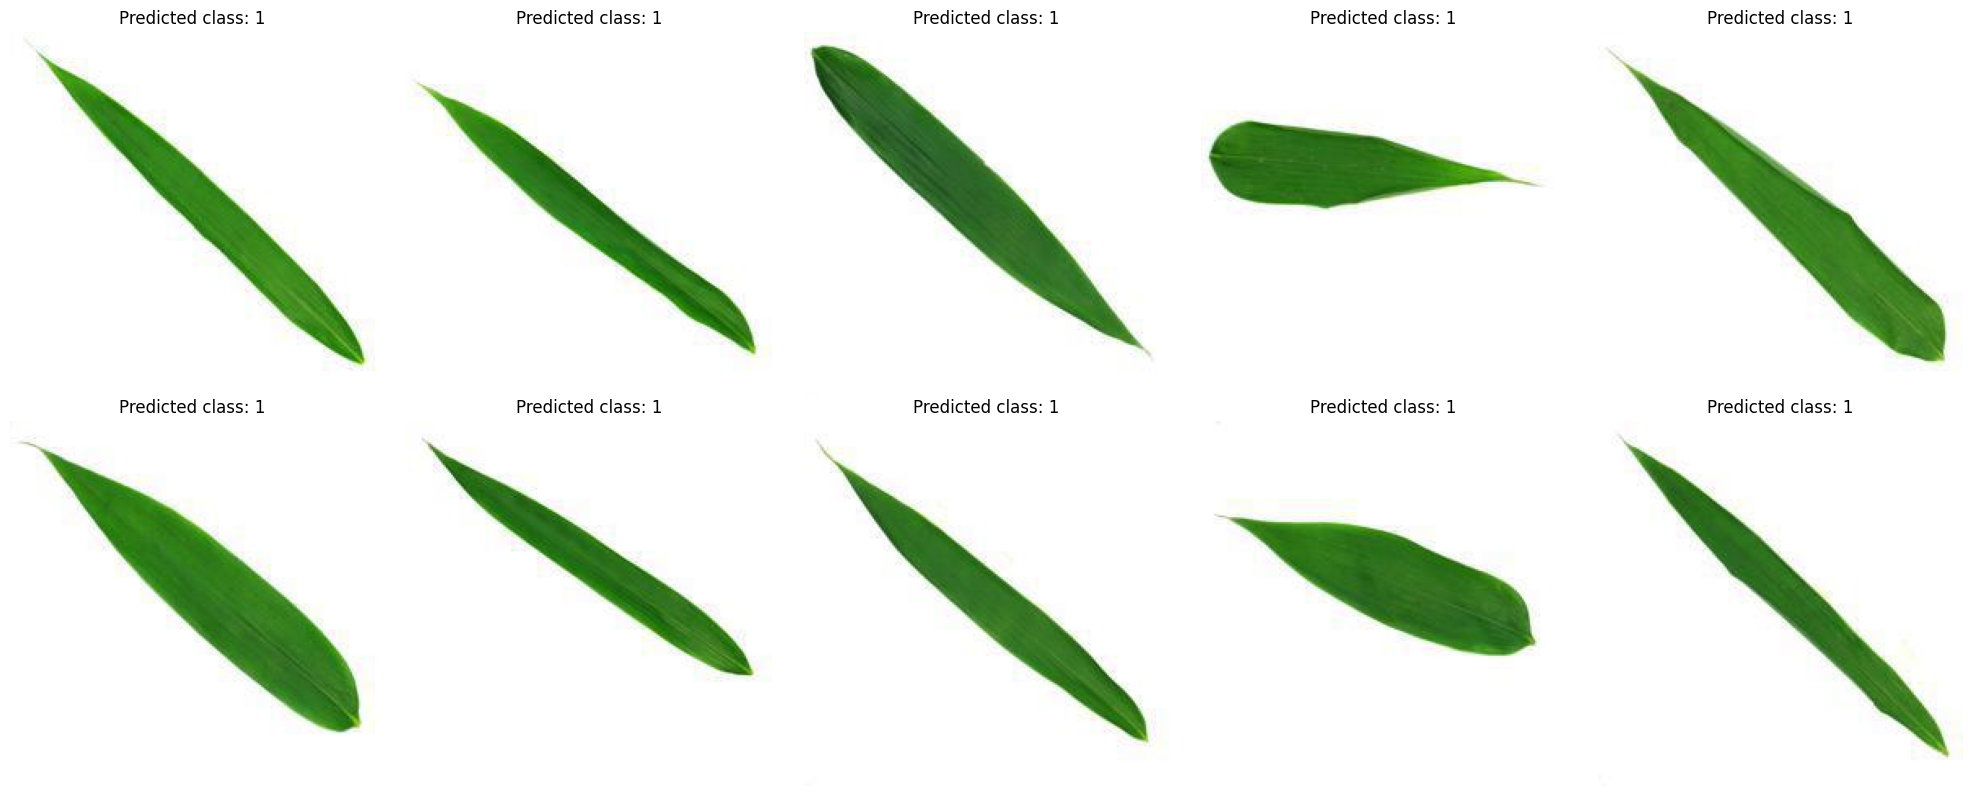

In [31]:
import cv2
from skimage.feature import hog
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def extract_hog_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

def predict_image_class(image_path, svm_model):
    hog_features = extract_hog_features(image_path)
    hog_features = np.array(hog_features).reshape(1, -1)
    predicted_class = svm_model.predict(hog_features)
    return predicted_class[0]

def main():
    svm_model = joblib.load("svm_model.pkl")
    folder_path = "/content/Leaves_fix/1"  # Thay thế bằng đường dẫn đến thư mục chứa các ảnh test

    image_files = os.listdir(folder_path)

    # Lấy 10 ảnh đầu tiên
    image_files = image_files[:10]

    # Tạo số hàng và cột của lưới hiển thị
    num_rows = 2
    num_cols = 5

    # Tạo cửa sổ hiển thị
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        # Đọc ảnh
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Dự đoán nhãn mô hình trên ảnh
        predicted_class = predict_image_class(image_path, svm_model)

        # Tính chỉ số hàng và cột của lưới
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Hiển thị ảnh và nhãn dự đoán trong cửa sổ tương ứng
        axes[row_idx, col_idx].imshow(image_rgb)
        axes[row_idx, col_idx].set_title(f"Predicted class: {predicted_class}")
        axes[row_idx, col_idx].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


#HOG+K-Nearest Neighbors: Feature Extraction and Training

Độ chính xác trên tập kiểm tra: 0.8036649214659686

Báo cáo phân loại:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80        15
           2       0.50      0.50      0.50        12
           3       0.70      1.00      0.82        16
           4       0.83      0.83      0.83        18
           5       0.90      0.82      0.86        11
           6       0.88      1.00      0.94        15
           7       1.00      1.00      1.00         5
           8       0.72      1.00      0.84        13
           9       0.57      0.57      0.57         7
          10       0.64      0.78      0.70         9
          11       0.80      0.73      0.76        11
          12       0.89      0.94      0.91        17
          13       0.82      0.82      0.82        11
          14       0.83      0.62      0.71         8
          15       0.42      0.83      0.56         6
          16       0.67      0.75      0.71         8
          

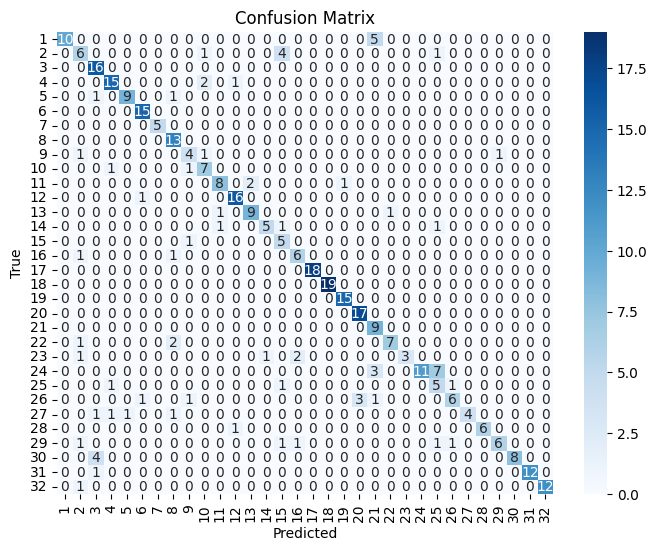

In [18]:
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt

def extract_hog_features(image_path, save_path=None):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    if save_path:
        image_name = os.path.basename(image_path)
        save_path = os.path.join(save_path, image_name)
        cv2.imwrite(save_path, hog_image)

    return hog_features

def load_data(root_folder):
    X = []
    y = []
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            hog_features = extract_hog_features(image_path, save_path="hog_images")
            X.append(hog_features)
            y.append(int(class_folder))

    return np.array(X), np.array(y)


def main():
    root_folder = "/content/Leaves_fix"  # Thay đổi đường dẫn thư mục dữ liệu của bạn tại đây
    X, y = load_data(root_folder)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình KNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Lưu mô hình vào file
    model_filename = "knn_model.pkl"
    joblib.dump(knn_model, model_filename)

    # Dự đoán nhãn tập kiểm tra
    y_pred = knn_model.predict(X_test)

    # Đánh giá hiệu suất phân loại
    accuracy = accuracy_score(y_test, y_pred)
    print("Độ chính xác trên tập kiểm tra:", accuracy)

    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))

    # Vẽ ma trận nhầm dưới dạng heatmap
    cm = confusion_matrix(y_test, y_pred)
    class_labels = sorted(set(y_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

if __name__ == "__main__":
    main()


#HOG + K-Nearest Neighbors: Test 10 Images



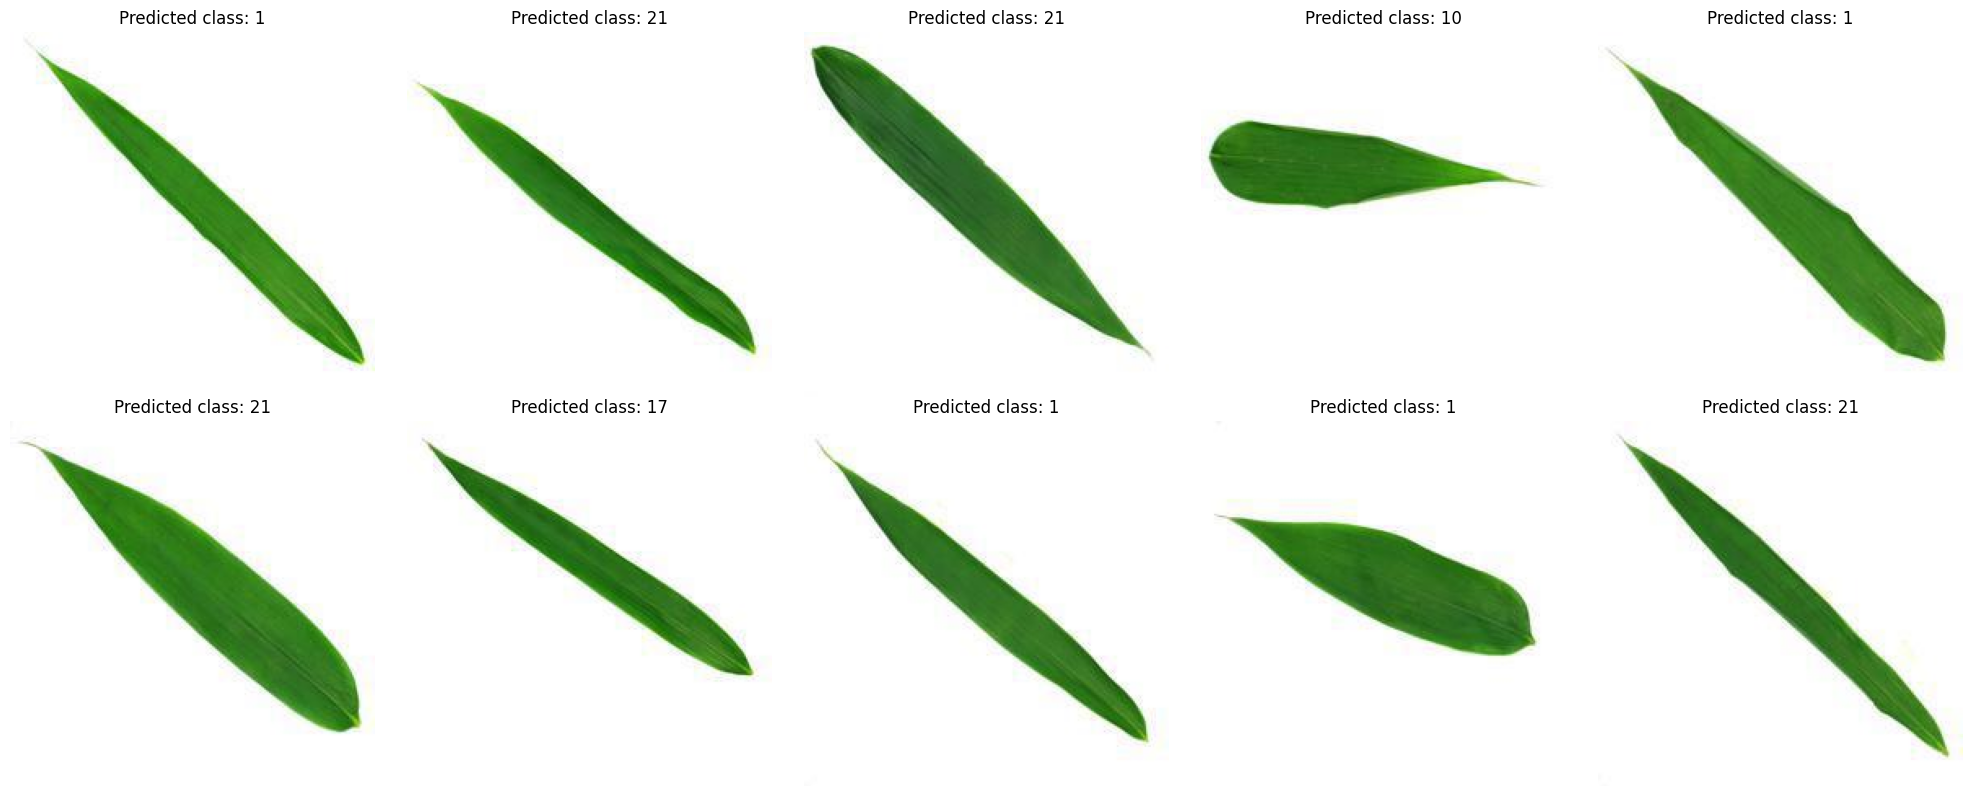

In [28]:
import cv2
from skimage.feature import hog
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def extract_hog_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

def predict_image_class(image_path, svm_model):
    hog_features = extract_hog_features(image_path)
    hog_features = np.array(hog_features).reshape(1, -1)
    predicted_class = svm_model.predict(hog_features)
    return predicted_class[0]

def main():
    knn_model = joblib.load("/content/knn_model.pkl")
    folder_path = "/content/Leaves_fix/1"  # Thay thế bằng đường dẫn đến thư mục chứa các ảnh test

    image_files = os.listdir(folder_path)

    # Lấy 10 ảnh đầu tiên
    image_files = image_files[:10]

    # Tạo số hàng và cột của lưới hiển thị
    num_rows = 2
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        # Đọc ảnh
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Dự đoán nhãn mô hình trên ảnh
        predicted_class = predict_image_class(image_path, knn_model)

        # Tính chỉ số hàng và cột của lưới
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Hiển thị ảnh và nhãn dự đoán trong cửa sổ tương ứng
        axes[row_idx, col_idx].imshow(image_rgb)
        axes[row_idx, col_idx].set_title(f"Predicted class: {predicted_class}")
        axes[row_idx, col_idx].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
